In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from scipy.stats import norm, skew
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('~/Project/EDA/Data/CreditCard.csv')

In [3]:
data.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Here is the description of the study variables :

- card : Factor. Was the application for a credit card accepted?
- reports : Number of major derogatory reports
- age : Age in years plus twelfths of a year.
- income : Yearly income (in USD 10,000).
- share : Ratio of monthly credit card expenditure to yearly income.
- expenditure : Average monthly credit card expenditure
- owner : Factor. Does the individual own their home?
- selfemp : Factor. Is the individual self-employed?
- dependents : Number of dependents.
- months : Months living at current address.
- majorcards : Number of major credit cards held.
- active : Number of active credit accounts.

In [5]:
data.drop(columns='Unnamed: 0', axis=0,inplace=True)

In [6]:
data.shape

(1319, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [8]:
data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [9]:
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [10]:
data.duplicated().sum()

0

## Target Variable

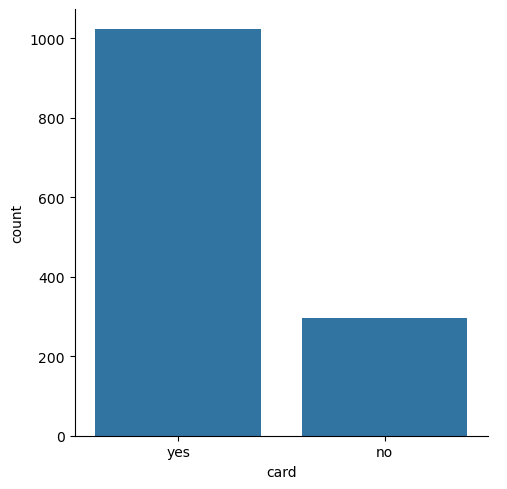

In [12]:
sns.catplot(kind='count',data=data,x='card')

- For over 1000 applicants the credit card application got accepted

## Univariate

### Numerical Variables

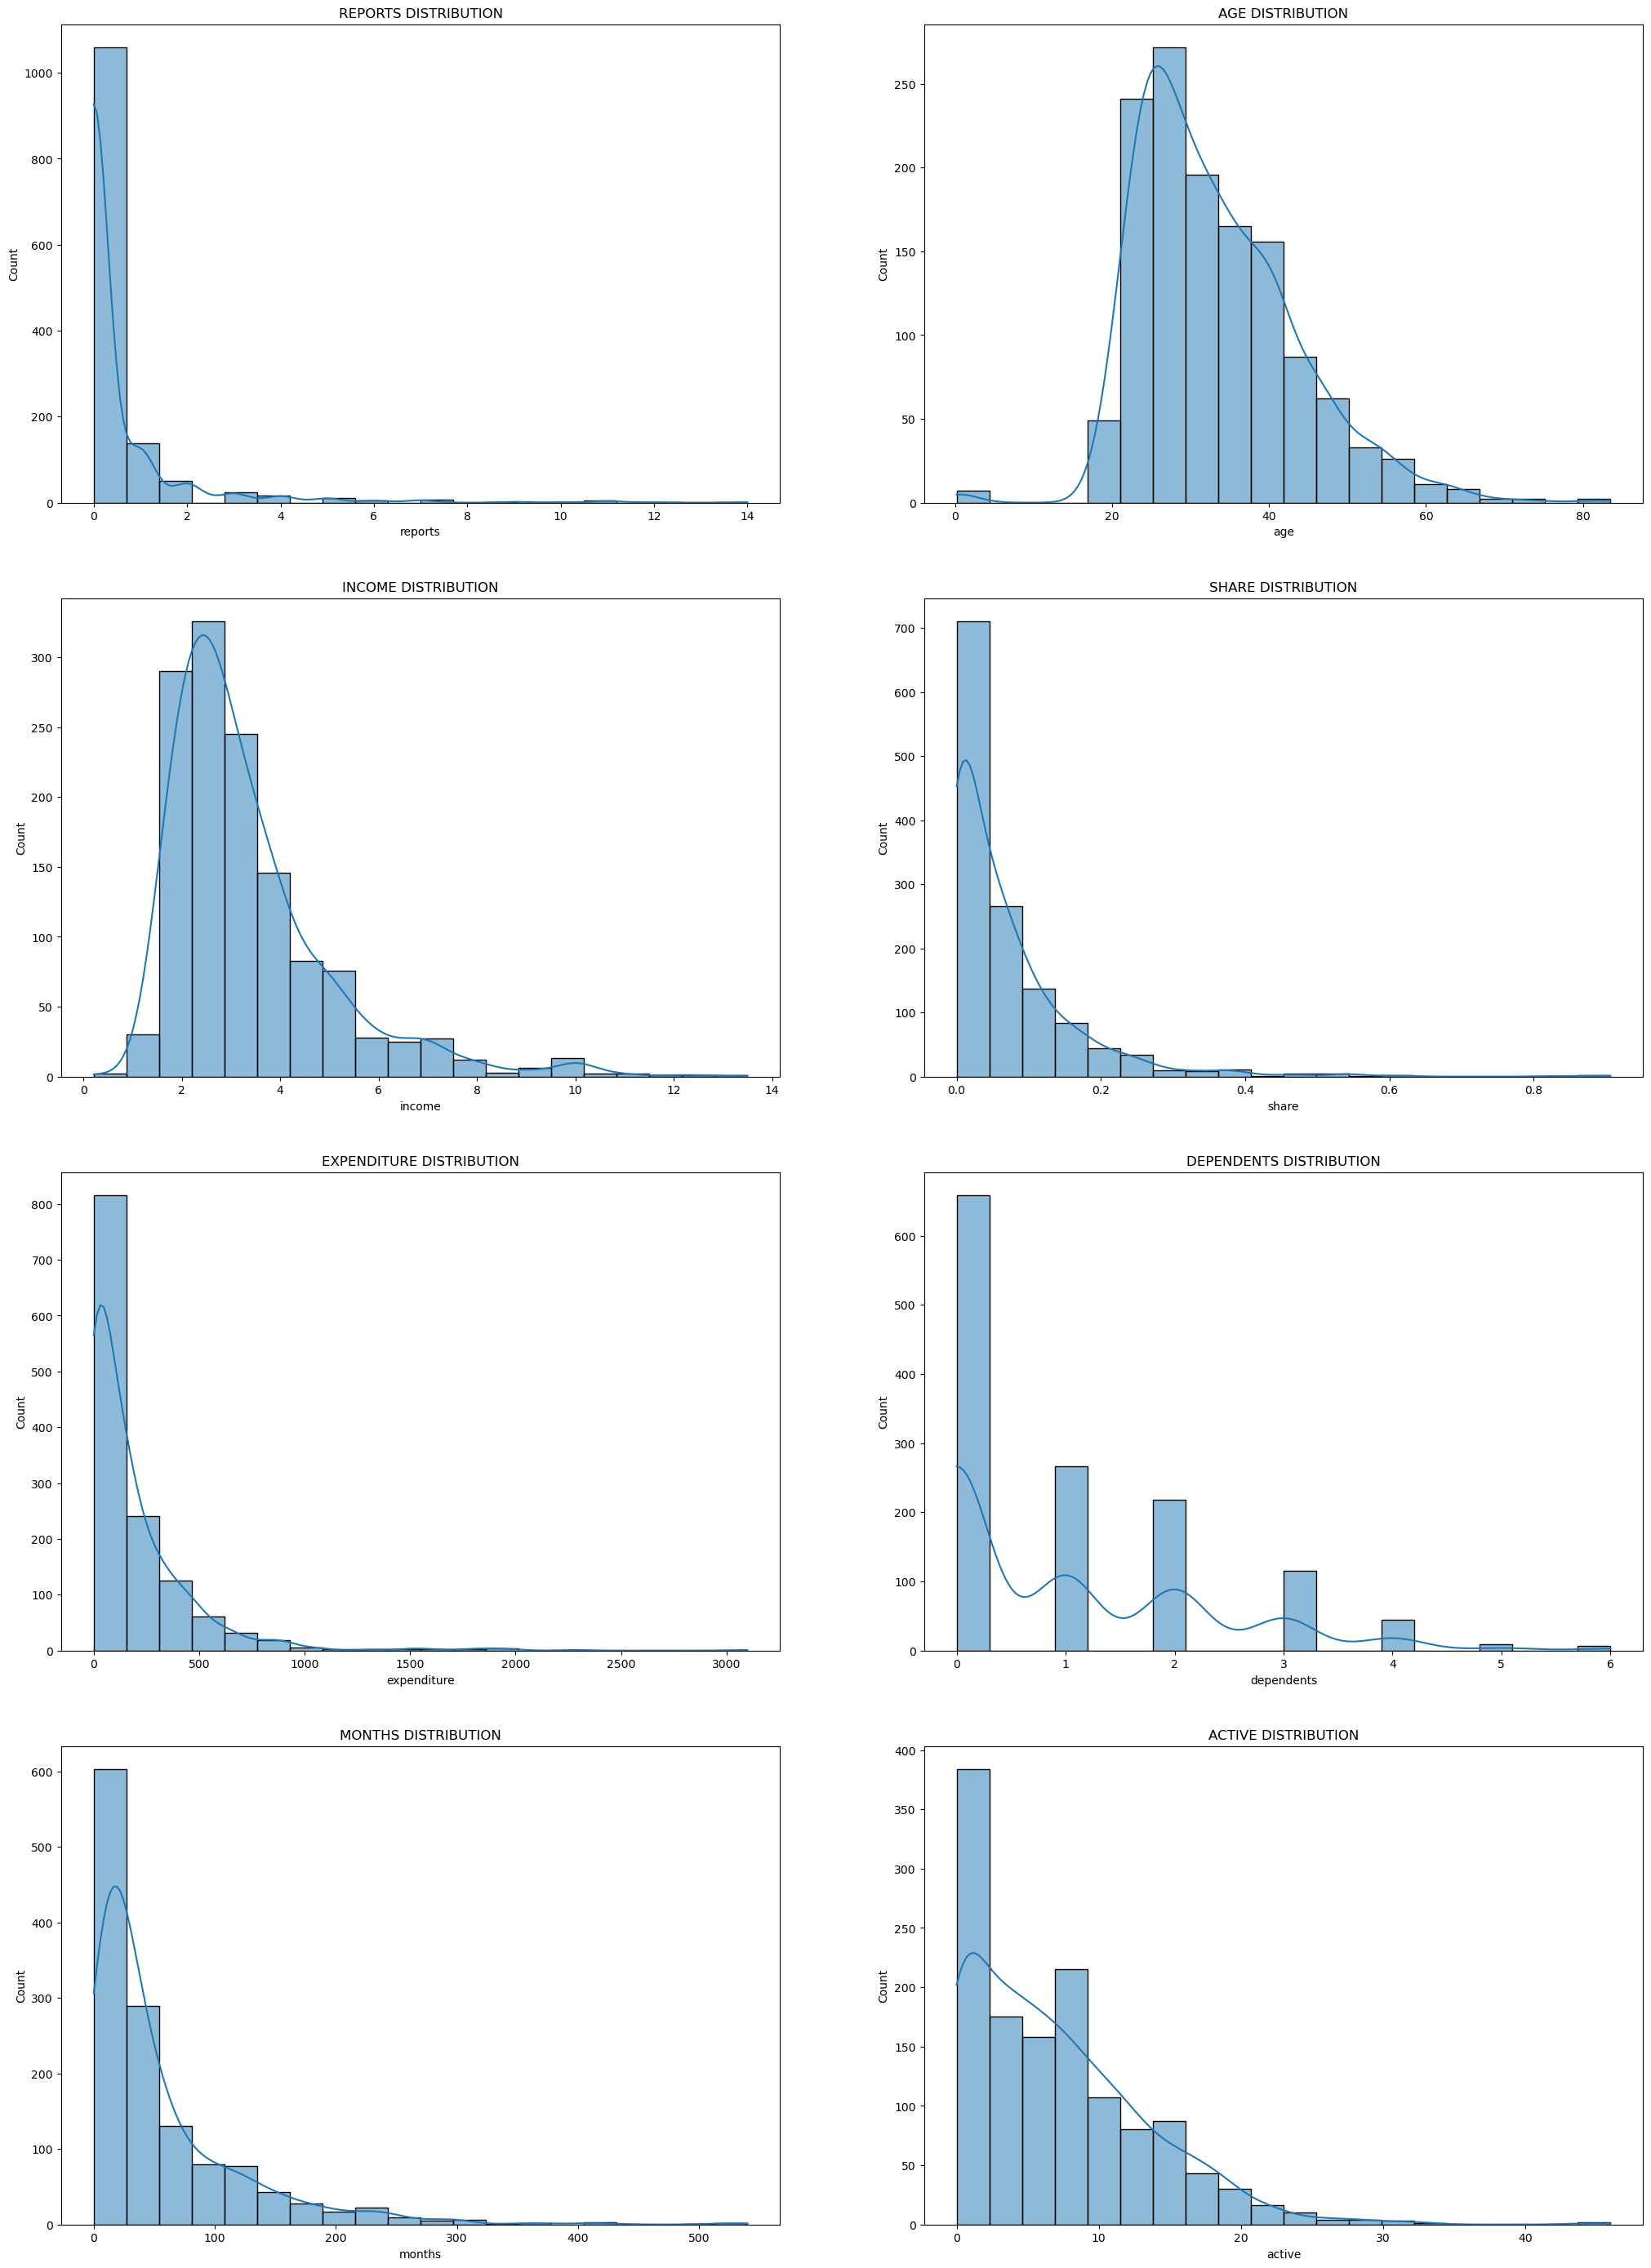

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(25,35))
axs = axs.flatten()
continuous = ['reports','age','income','share','expenditure','dependents','months','active']

for i, ax in zip(continuous, axs):
    sns.histplot(data=data, x=i,bins=20, kde=True, ax=ax)
    ax.set_title(i.upper()+' DISTRIBUTION')

- Reports variable have a distrbution of log normal. Most of the people have 0 major derogatory reports
- The age variable is slightly right skewed data and close to normal distribution. Number of people in 25 to 35 age group is higher.
- Income distribution is also right skewed, most of the people have less income.
- Share distribution is also similar to log-normal distribution. Most of the people have less ratio of monthly credit card expenditure to yearly income.
- Expenditure distribution is also similar to log-normal distribution. Most of the people have less average monthly credit card expenditure that is less than 500
- Dependence is discrete variable. Number of people is decreasing as the number of dependents increase
- Months distribution is also acting like log-normal distribution. Most of the people have living in their current address for 0 to 80 months.
- Active variable have right skewed distribution. Most of people have lesser than 10 credit accounts. Number of people having 0 credit accounts is very high

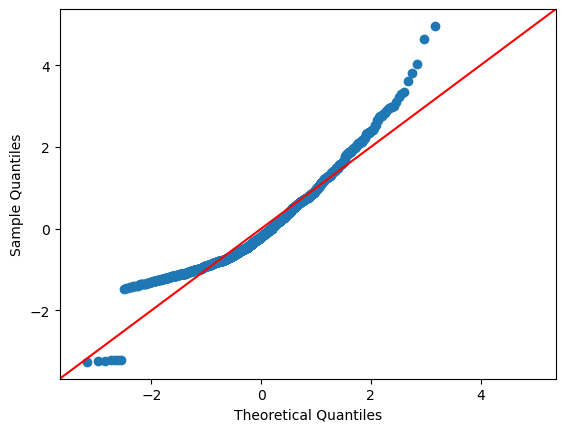

In [17]:
sm.qqplot(data['age'],norm,fit=True,line='45')
plt.show()

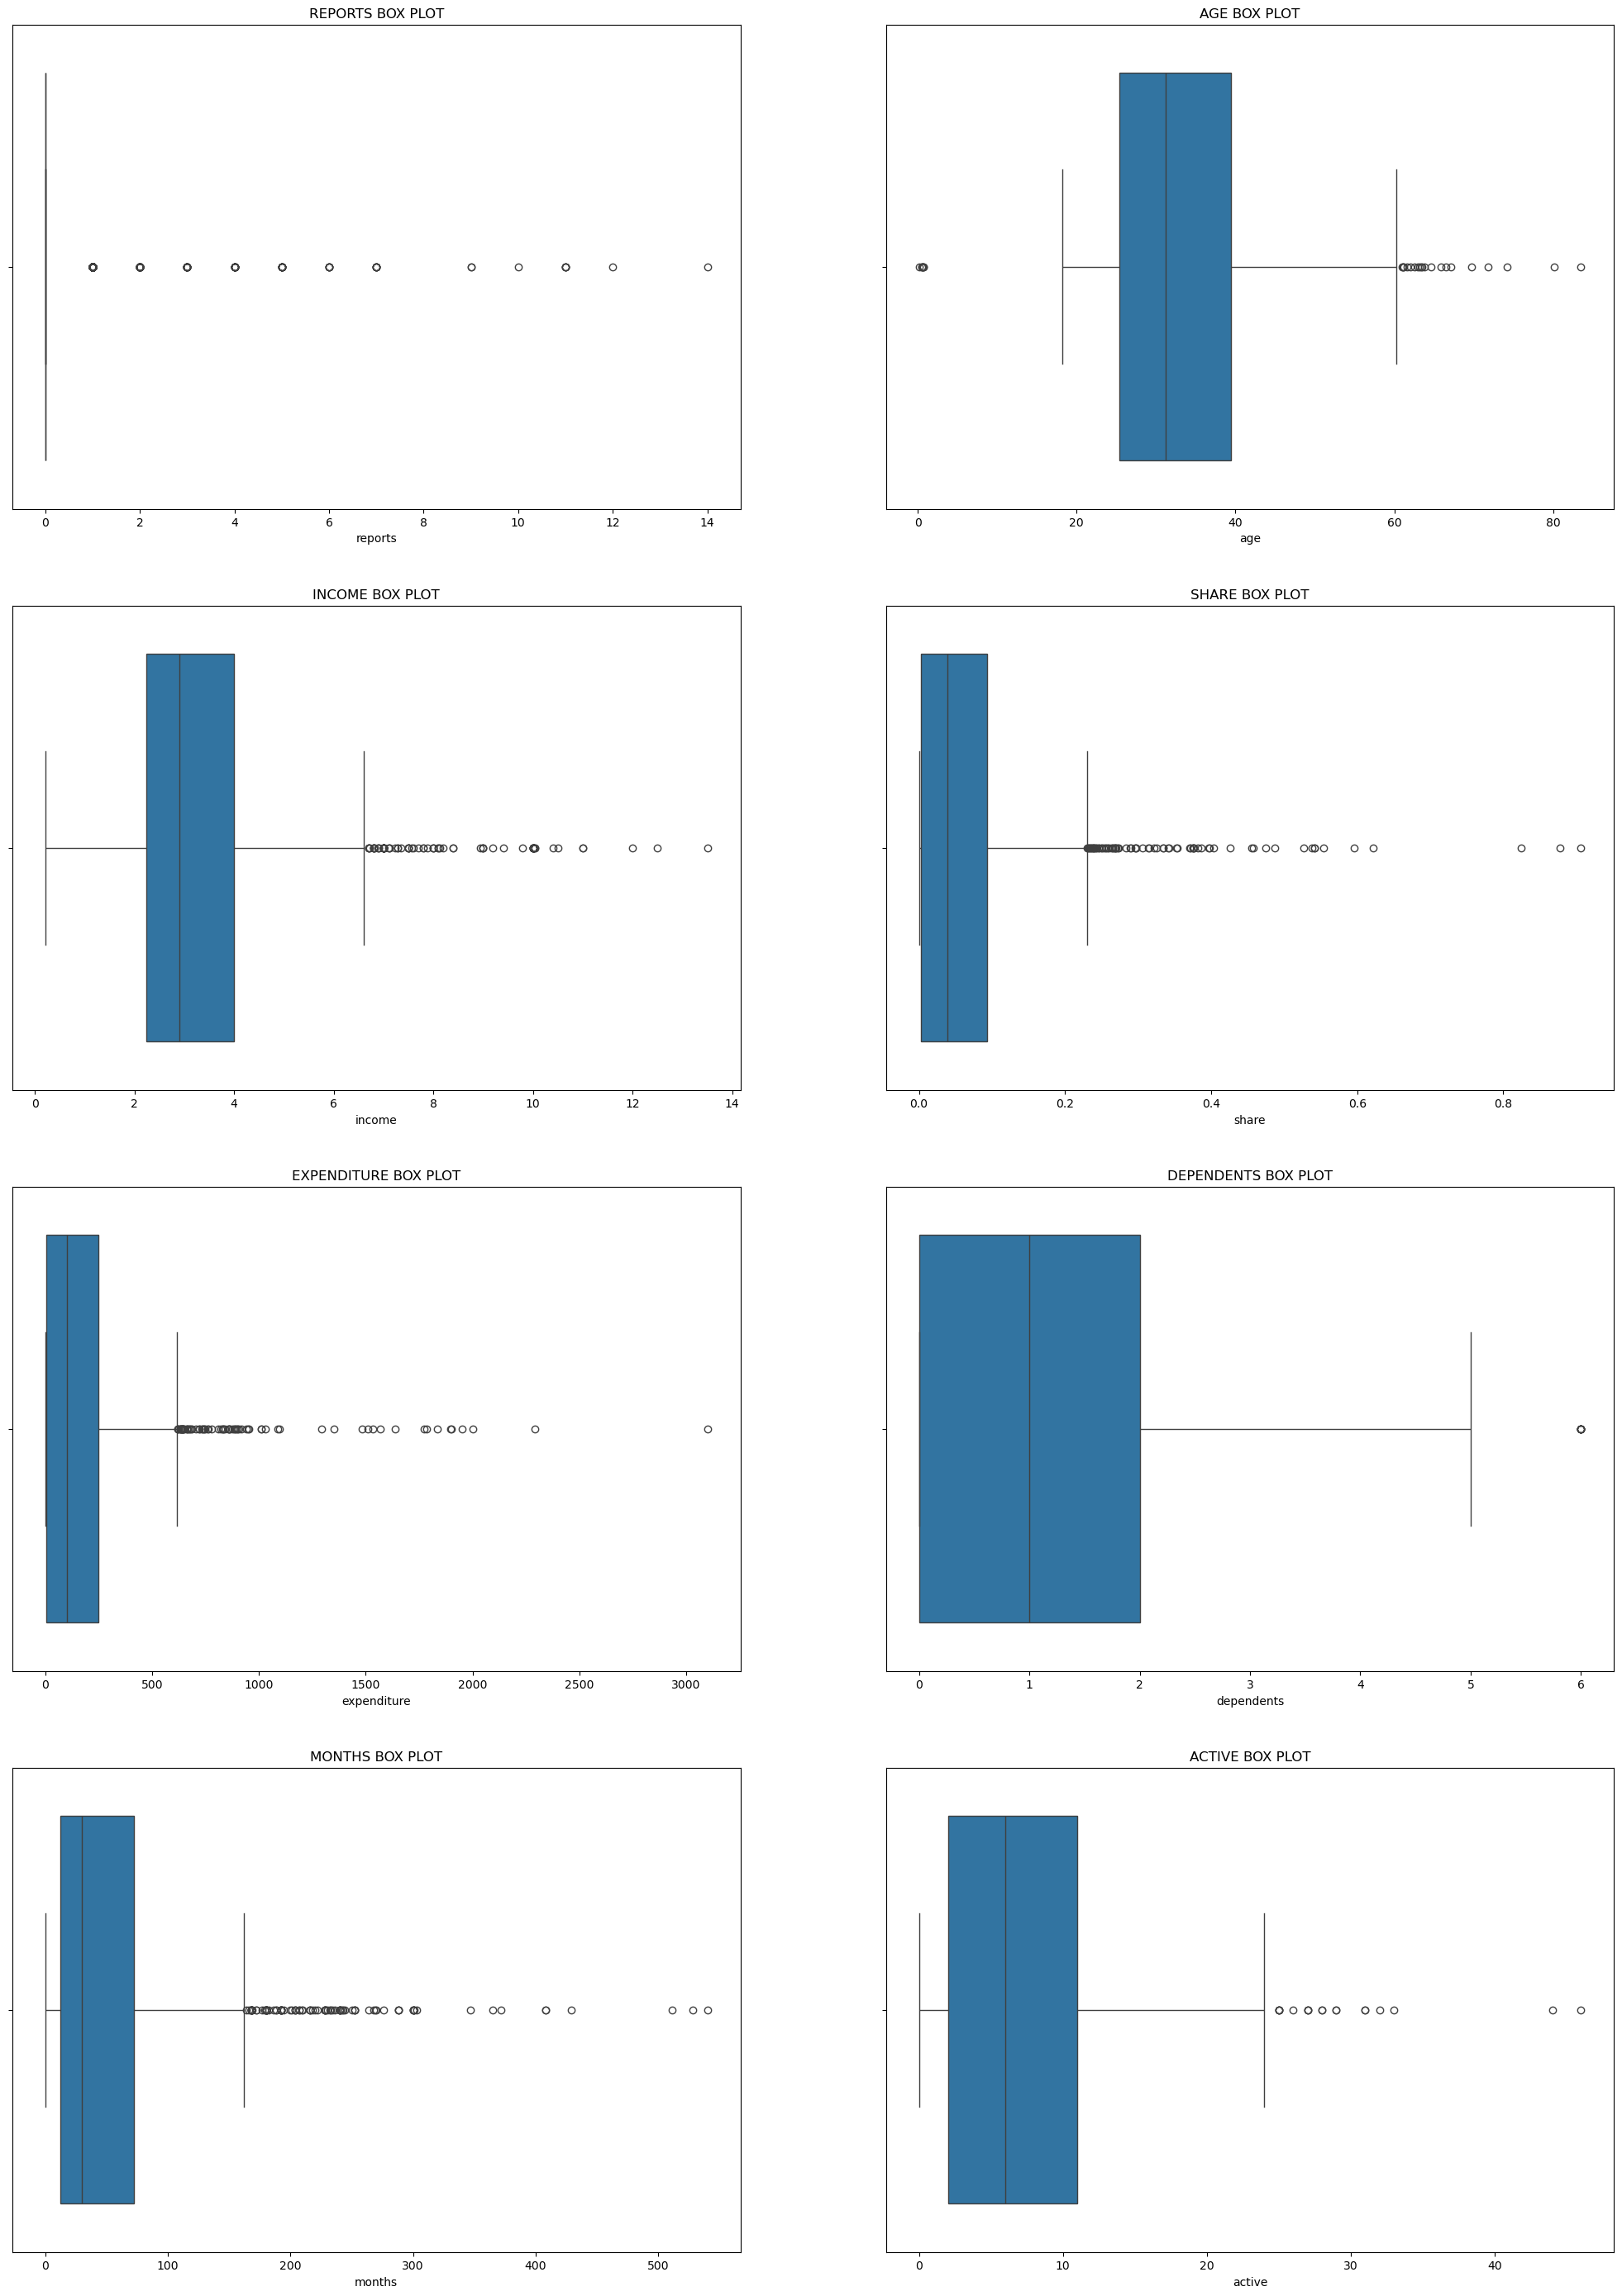

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(25,35),)

axs = axs.flatten()
continuous = ['reports','age','income','share','expenditure','dependents','months','active']


for i, ax in zip(continuous, axs):
    sns.boxplot(data=data, x=i,ax=ax)
    ax.set_title(i.upper()+' BOX PLOT')

- The outliers in reports variable are natural values which are possible in real life
- Age have some treatable outliers where age is below 18
- Reamining all variables have natural outliers which are possible in real life

In [20]:
data[data['age']<18]

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
78,yes,0,0.500000,3.05,0.101724,258.54920,no,no,1,94,1,5
323,yes,0,0.166667,3.24,0.184366,497.70580,yes,no,3,25,1,16
434,yes,0,0.583333,2.50,0.083171,173.02330,no,no,0,150,1,5
461,no,0,0.750000,3.00,0.000400,0.00000,no,no,0,18,0,2
655,yes,0,0.583333,4.00,0.072664,242.12830,yes,no,3,24,1,4
658,yes,1,0.500000,3.70,0.010637,32.46416,no,no,0,186,0,5
1194,yes,0,0.750000,1.60,0.154191,205.25420,no,no,0,1,1,9


- These are the data points which are being outliers due to the age value

In [22]:
data.skew(axis=0,numeric_only=True)

reports        4.884221
age            0.841428
income         1.928085
share          3.167606
expenditure    3.720321
dependents     1.234275
months         2.570304
majorcards    -1.644000
active         1.213365
dtype: float64

In [23]:
data.kurt(axis=0,numeric_only=True)

reports        30.556681
age             1.472542
income          4.933327
share          16.253759
expenditure    22.281899
dependents      1.092424
months          9.478653
majorcards      0.703802
active          2.358621
dtype: float64

## Categorical Values

In [25]:
category = ['owner','selfemp','majorcards']

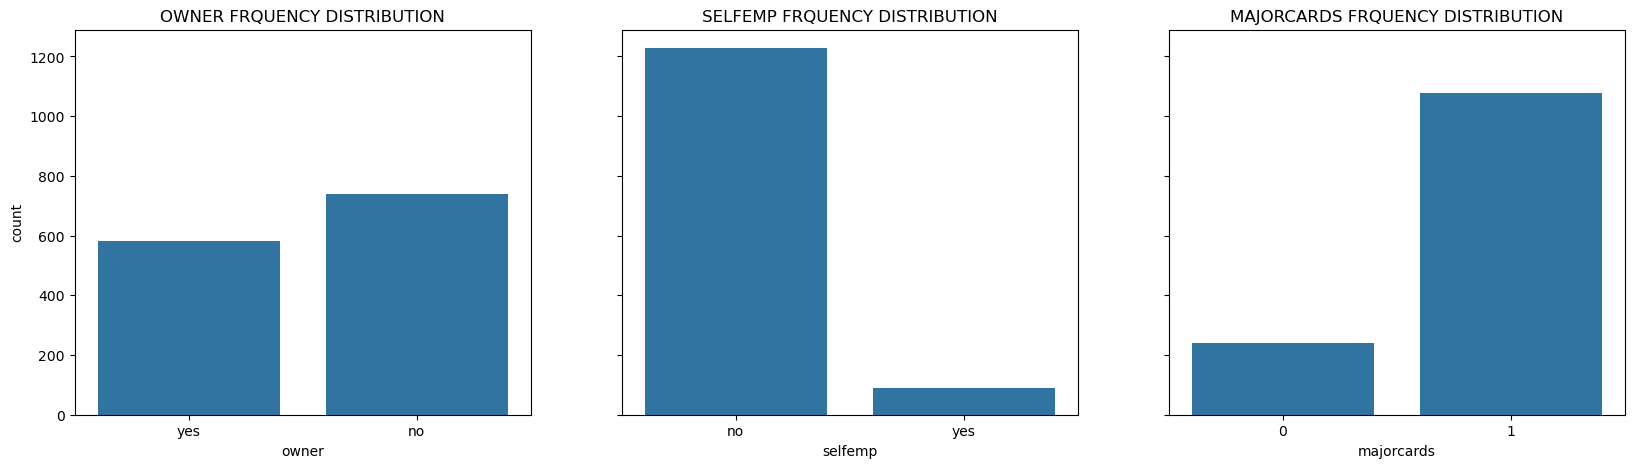

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)

axs = axs.flatten()

for i, ax in zip(category, axs):
    sns.countplot(data=data, x=i,ax=ax)
    ax.set_title(i.upper()+' FRQUENCY DISTRIBUTION')

- Nearly 600 people are owner of their home. And nearly 800 people does not own any home.
- Nearly 1200 individuals are self employed. And less  than 150 people are not self employed
- More than 1000 individuals have majorcards

## Bivariate Analysis

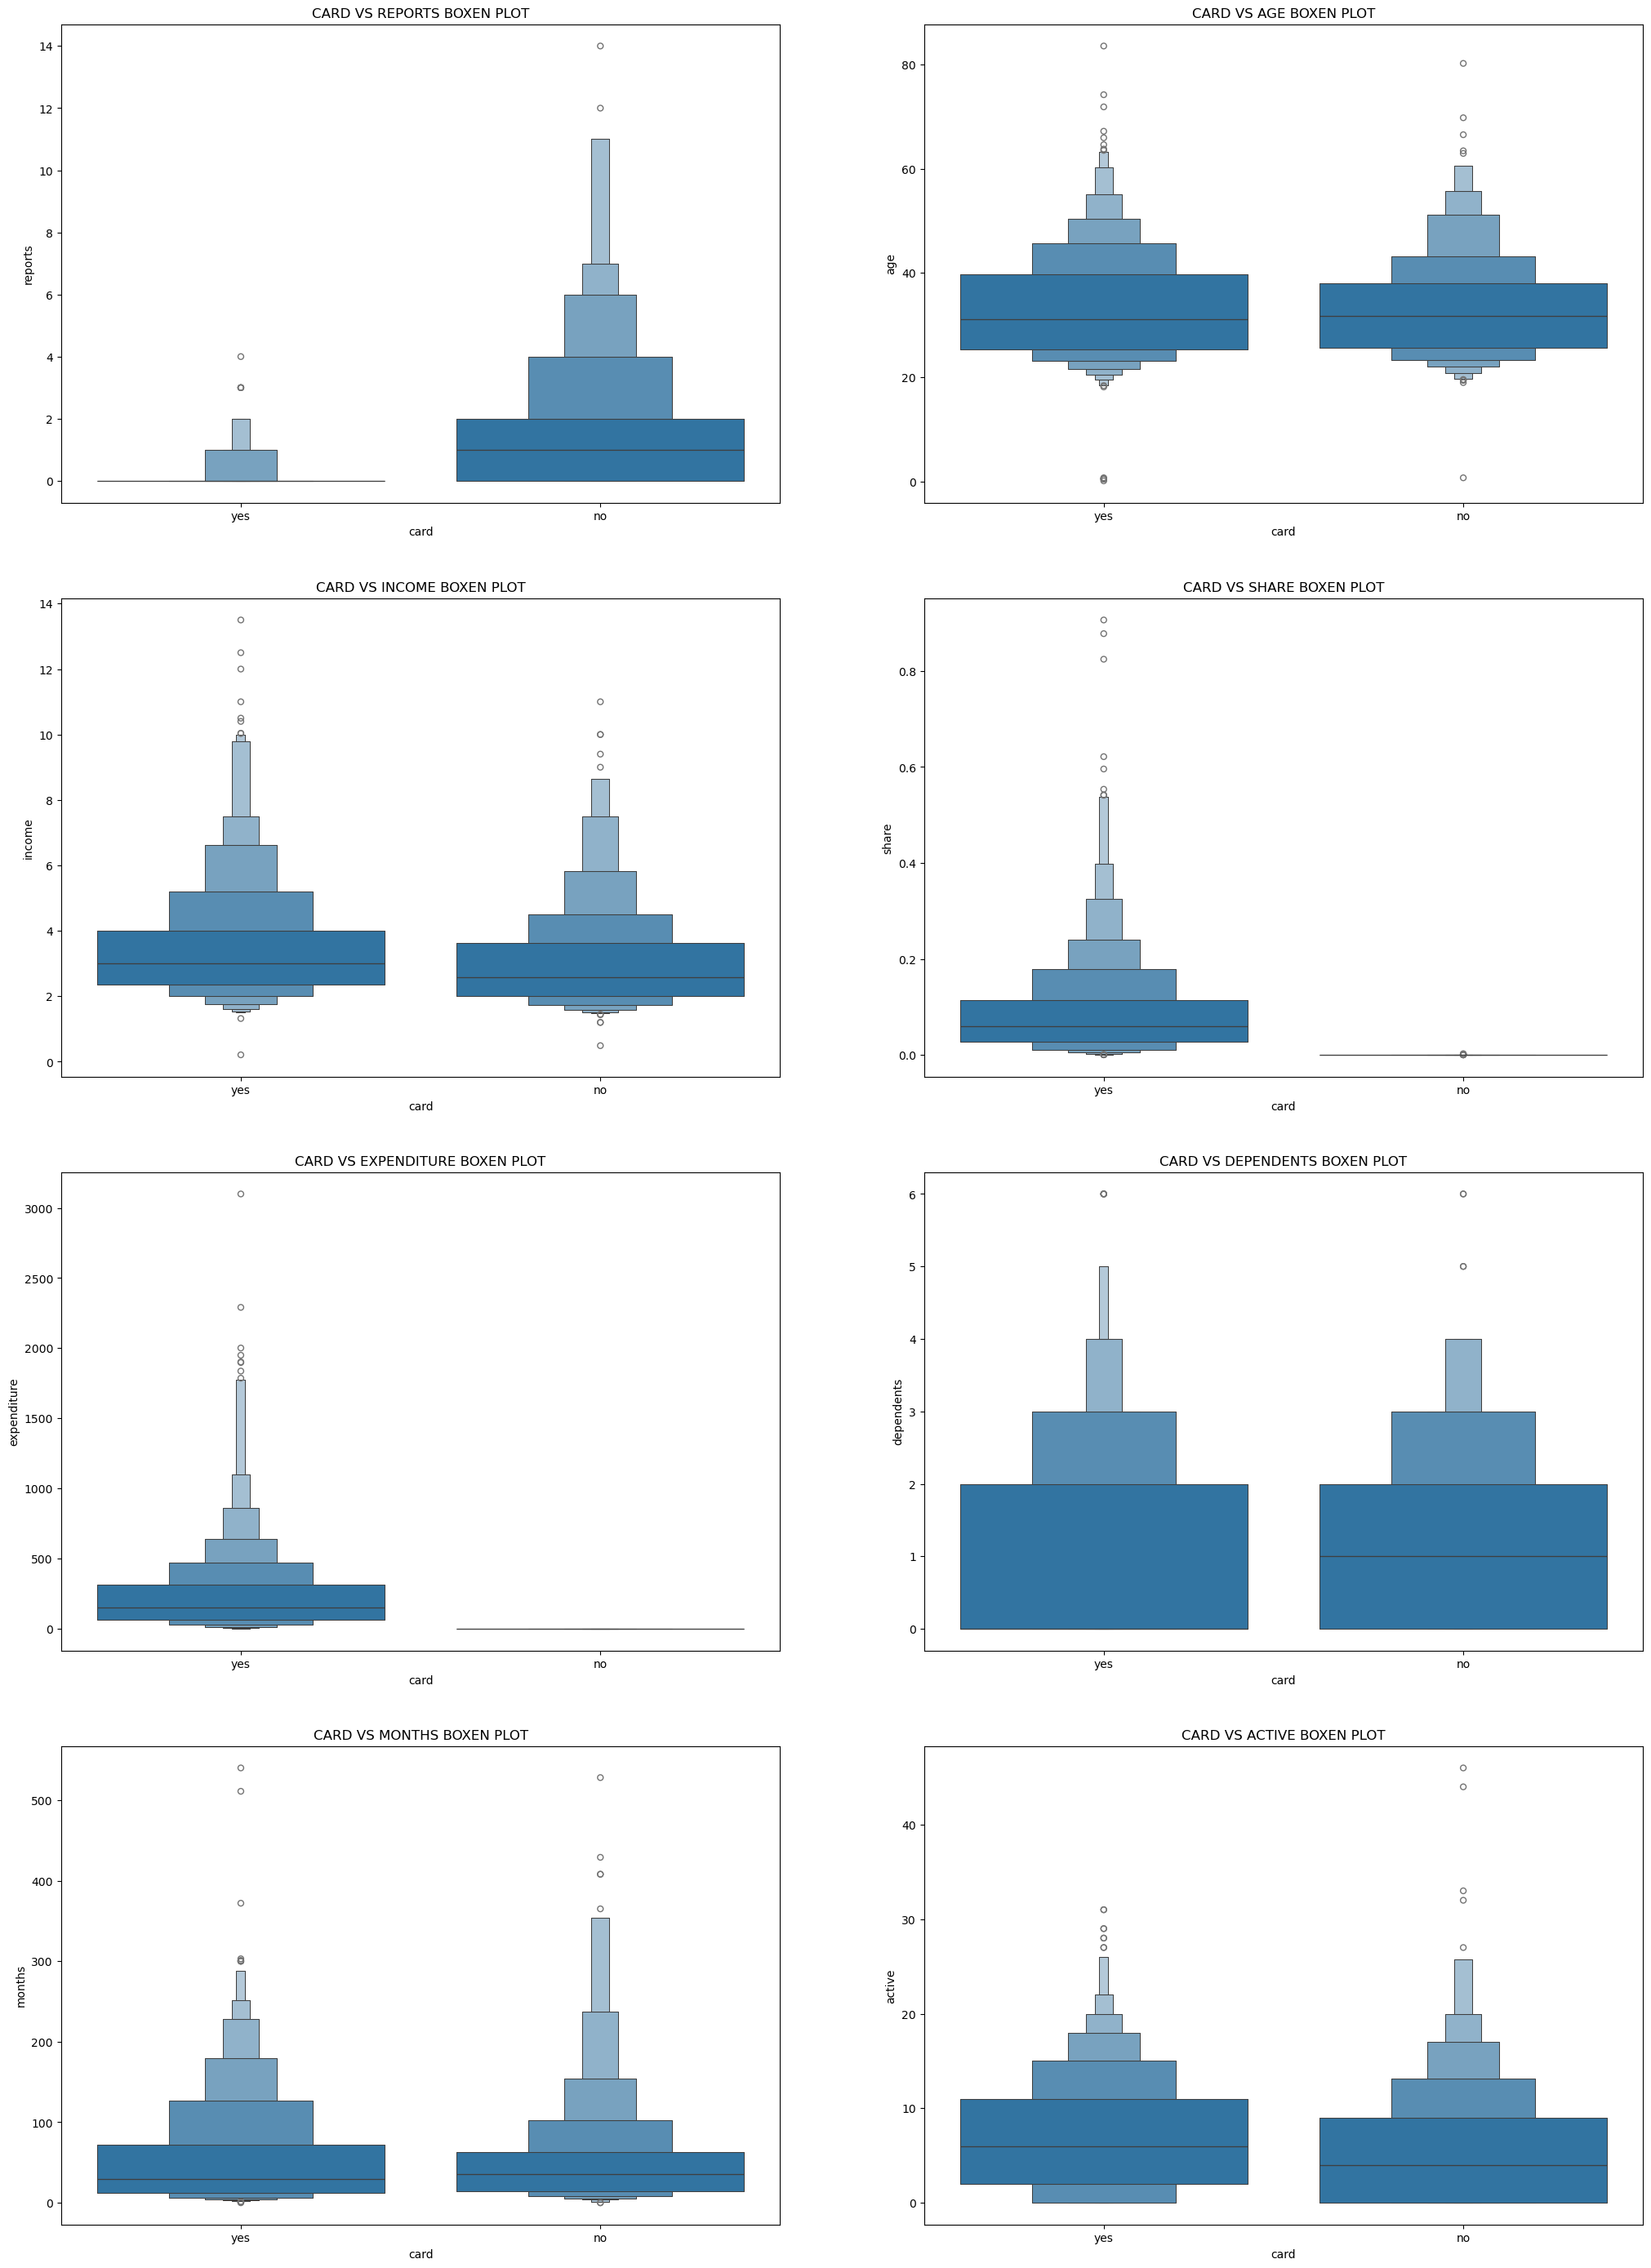

In [29]:
fig, axs = plt.subplots(4, 2, figsize=(25,35))
axs = axs.flatten()
continuous = ['reports','age','income','share','expenditure','dependents','months','active']

for i, ax in zip(continuous, axs):
    sns.boxenplot(data=data,x='card',y=i,ax=ax)
    ax.set_title('CARD VS '+i.upper()+' BOXEN PLOT')



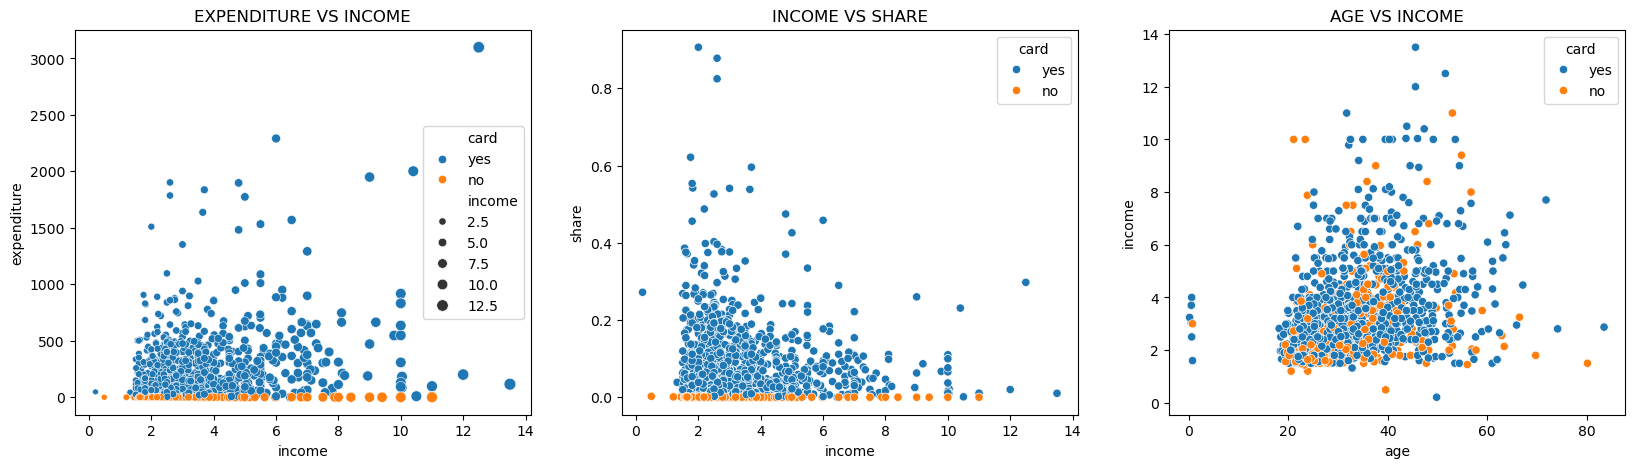

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20,5),)

sns.scatterplot(data=data,x='income',y='expenditure',hue='card',size='income',ax=axs[0])
axs[0].set_title("EXPENDITURE VS INCOME")

sns.scatterplot(data=data,x='income',y='share',hue='card',ax=axs[1])
axs[1].set_title("INCOME VS SHARE")


sns.scatterplot(data=data,x='age',y='income',hue='card',ax=axs[2])
axs[2].set_title("AGE VS INCOME")

plt.show()

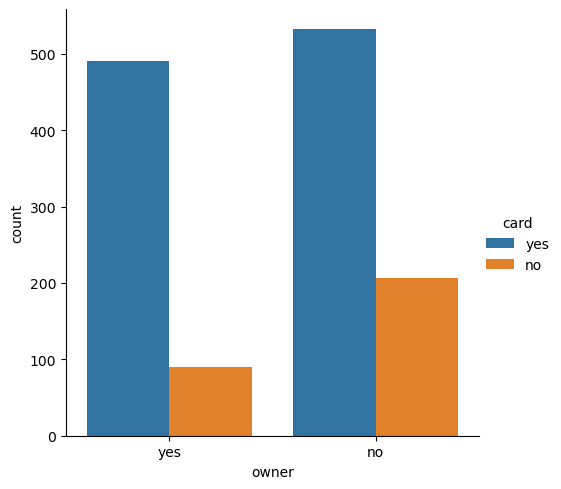

In [31]:
sns.catplot(kind='count',data=data,x='owner', hue='card')
plt.show()

- The individuals who does not own any house got more rejected than the individuals who owns a house

In [33]:
contingency_card_owner = pd.crosstab(data['card'], data['owner'])
contingency_card_selfemp = pd.crosstab(data['card'], data['selfemp'])
chi2_card_owner, p_card_owner, dof_card_owner, expected_card_owner = chi2_contingency(contingency_card_owner)
chi2_card_selfemp, p_card_selfemp, dof_card_selfemp, expected_card_selfemp = chi2_contingency(contingency_card_selfemp)

chi_square_results = {
    'card_vs_owner': {
        'chi2_statistic': chi2_card_owner,
        'p_value': p_card_owner,
        'degrees_of_freedom': dof_card_owner
    },
    'card_vs_selfemp': {
        'chi2_statistic': chi2_card_selfemp,
        'p_value': p_card_selfemp,
        'degrees_of_freedom': dof_card_selfemp
    }
}

chi_square_results


{'card_vs_owner': {'chi2_statistic': 28.11407333689662,
  'p_value': 1.1437115047558145e-07,
  'degrees_of_freedom': 1},
 'card_vs_selfemp': {'chi2_statistic': 3.3978632376228446,
  'p_value': 0.0652809326574606,
  'degrees_of_freedom': 1}}

- The chi score is 28 roughly. The larger the value the greater the difference between the observed and expected counts.
- The P value of card_vs_owner chi-square test is 1.1437115047558145e-07 which is lesser than p=0.05(significance level). As the null hypothesis of the chi square test is 'the variables are independent to each other'. We conclude that the variable card and owner are dependent to each other.
- Individuals who have their own house are more likely to get the credit card.

In [35]:
t_stat_income, p_value_income = ttest_ind(data[data['card'] == 'yes']['income'],
                                          data[data['card'] == 'no']['income'])
t_test_results = {
    'income': {
        't_statistic': t_stat_income,
        'p_value': p_value_income
    }
}

t_test_results


{'income': {'t_statistic': 3.4377883877255977,
  'p_value': 0.0006047776915757775}}

- The p value is 0.000604 which is less than significance level i.e. p=0.05. So the variable card is dependent to the variable income.

## Multivariate Analysis

In [38]:
data['card'] = data['card'].apply(lambda x: 0 if x=='no' else 1)
data['owner'] = data['owner'].apply(lambda x: 0 if x=='no' else 1)
data['selfemp'] = data['selfemp'].apply(lambda x: 0 if x=='no' else 1)

[]

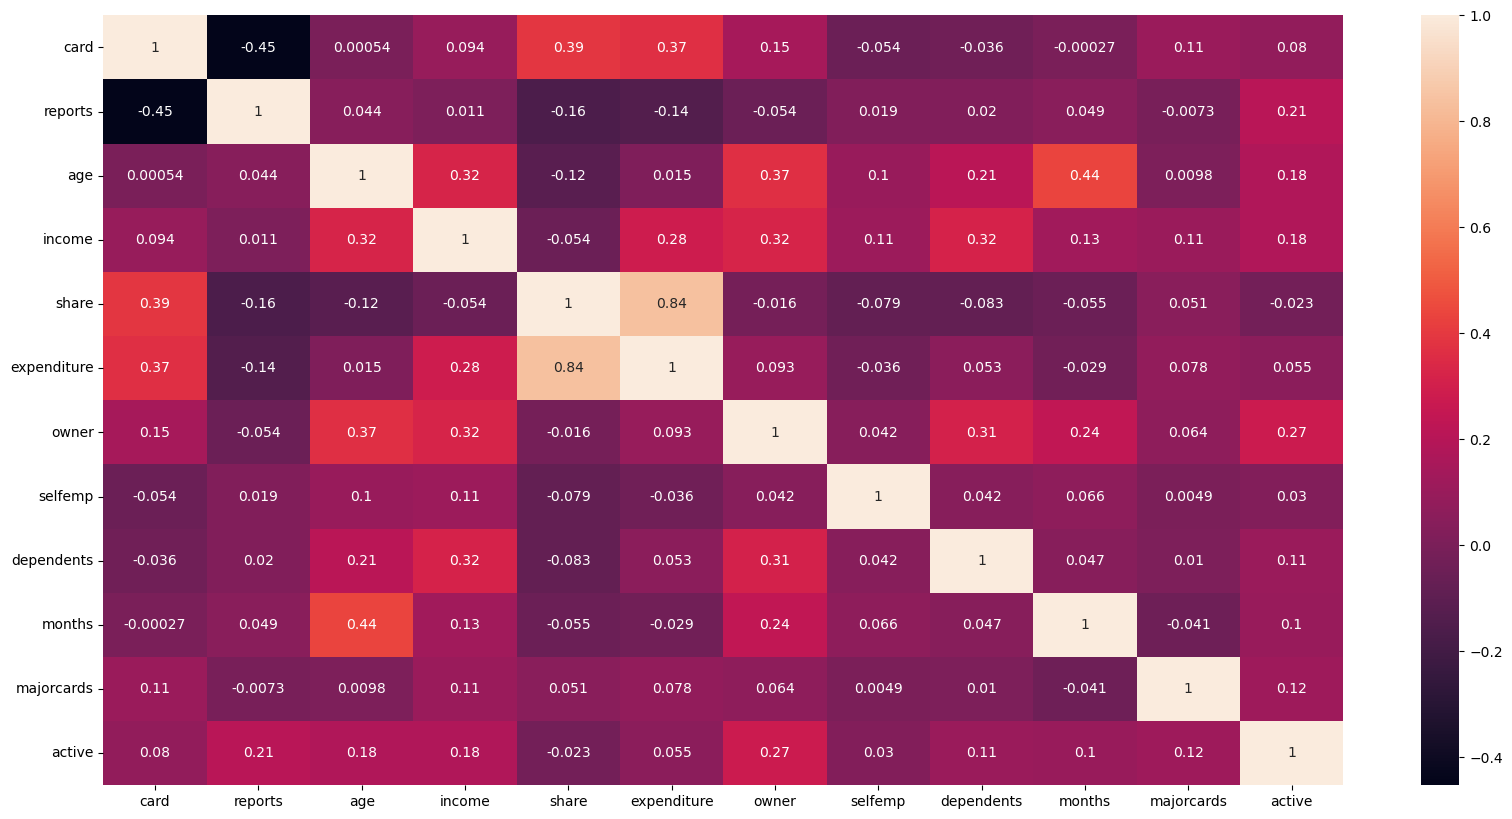

In [39]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [40]:
st = StandardScaler()

In [41]:
new_df = st.fit_transform(data.drop(columns=['card'],axis=0))

In [42]:
new_df

array([[-3.39396801e-01,  4.39253790e-01,  6.81894274e-01, ...,
        -1.91349689e-02,  4.72823595e-01,  7.93701110e-01],
       [-3.39396801e-01,  3.63911355e-03, -5.58317282e-01, ...,
        -3.21037170e-01,  4.72823595e-01,  9.52345111e-01],
       [-3.39396801e-01,  4.47351355e-02,  6.70082735e-01, ...,
         4.12454712e-02,  4.72823595e-01, -3.16806899e-01],
       ...,
       [-3.39396801e-01,  7.26922985e-01,  7.29140428e-01, ...,
        -8.19175801e-01,  4.72823595e-01, -7.92738902e-01],
       [-3.39396801e-01, -3.74569084e-02,  1.97621190e-01, ...,
         7.14356913e-02,  4.72823595e-01,  4.81103870e-04],
       [-3.39396801e-01,  1.48308407e+00,  1.97621190e-01, ...,
        -8.04080691e-01,  4.72823595e-01, -1.11002690e+00]])

In [43]:
pca = PCA(n_components=11)

In [44]:
pca.fit_transform(new_df)

array([[ 1.80241541, -0.23592822,  0.44957631, ..., -0.25594095,
        -0.0341919 , -0.0927598 ],
       [ 0.01702127, -0.81958159,  0.77032253, ..., -1.68272547,
         0.34324441,  0.0927402 ],
       [ 1.5302016 , -0.66411762, -0.02519474, ..., -0.04269307,
        -0.40691742, -0.15577622],
       ...,
       [ 0.92358777, -0.22272299, -0.16991057, ...,  0.88128274,
         0.63704989, -0.11595148],
       [-0.16603605, -1.0105528 , -0.27238114, ..., -0.38067696,
        -0.04611164, -0.0233631 ],
       [ 1.02915838,  0.84272452, -0.58011038, ...,  0.98409718,
         1.43445425,  0.03179799]])

In [45]:
pca.explained_variance_

array([2.29994893, 1.94359239, 1.15678174, 1.0753915 , 0.98786459,
       0.95294625, 0.77777399, 0.65964428, 0.55071142, 0.50680204,
       0.09688884])

In [46]:
pca.explained_variance_ratio_.cumsum()

array([0.20892775, 0.38548401, 0.49056626, 0.588255  , 0.67799279,
       0.76455858, 0.8352117 , 0.8951339 , 0.94516062, 0.9911986 ,
       1.        ])

In [86]:
X_train,X_test, y_train, y_test = train_test_split(new_df,data['card'],test_size=0.2,random_state=2)

In [104]:
lr = LogisticRegression(max_iter=500)

In [106]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [110]:
y_pred = lr.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred)

0.9545454545454546

In [116]:
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1_score: ",f1_score(y_test,y_pred))

Recall:  0.9751243781094527
Precision:  0.9655172413793104
F1_score:  0.9702970297029703


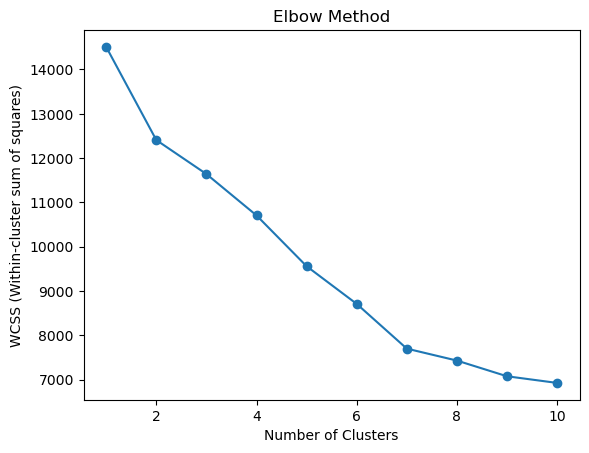

In [118]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

For n_clusters = 2, the silhouette score is 0.1860463094251177
For n_clusters = 3, the silhouette score is 0.13528518043972038
For n_clusters = 4, the silhouette score is 0.14689143482045947
For n_clusters = 5, the silhouette score is 0.17950591239416847
For n_clusters = 6, the silhouette score is 0.19213333562291787
For n_clusters = 7, the silhouette score is 0.2123154485000825
For n_clusters = 8, the silhouette score is 0.21096722427652753
For n_clusters = 9, the silhouette score is 0.2057233259209388
For n_clusters = 10, the silhouette score is 0.20484981267975538


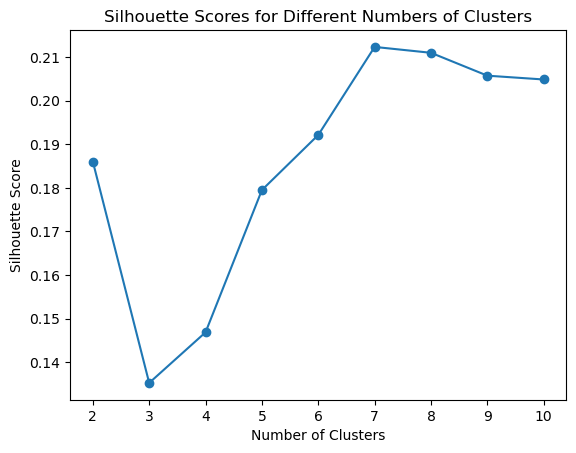

In [124]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}')

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()